In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.api import qqplot
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score



In [2]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_error # 平方绝对误差
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
import pandas as pd
import dateutil
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools
import scipy
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
import pyramid as pm
from sklearn import metrics
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')
from sklearn.utils.validation import check_array as check_arrays

读取预测 北京 成都 武汉 大连 四个城市数据 并 预测

In [108]:
Beijing_data = pd.read_csv("D:/ThirdTerm/论文数据/收集的数据/BeiJingDATA.csv")
Wuhan_data = pd.read_csv("D:/ThirdTerm/论文数据/收集的数据/WuhanDATA.csv")
Chengdu_data = pd.read_csv("D:/ThirdTerm/论文数据/收集的数据/ChengduDATA.csv")
Dalian_data=pd.read_csv("D:/ThirdTerm/论文数据/收集的数据/DalianDATA.csv")
Taiyuan_data=pd.read_csv("D:/ThirdTerm/论文数据/收集的数据/TaiyuanDATA.csv")
Guangzhou_data=pd.read_csv("D:/ThirdTerm/论文数据/收集的数据/GuangzhouDATA.csv")


D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
Beijing_data.head()


,STATION,NAME,DATE,CDSD,CLDD,DP01,DP10,DT00,DT32,DX32,...,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
0,CHM00054511,"BEIJING, CH",1951-01,0.0,0.0,4,1,6.0,31.0,18.0,...,0.0,-9.0,0.18,51.0,NaN,1391.0,0.32,20.1,31.5,8.8
1,CHM00054511,"BEIJING, CH",1951-02,0.0,0.0,4,2,0.0,28.0,5.0,...,0.0,10.0,0.21,53.0,NaN,1007.0,0.40,29.0,38.4,19.7
2,CHM00054511,"BEIJING, CH",1951-03,0.0,0.0,1,0,0.0,21.0,2.0,...,0.0,9.0,0.06,71.0,NaN,773.0,0.06,40.1,51.8,28.3
3,CHM00054511,"BEIJING, CH",1951-04,0.0,0.0,1,0,0.0,0.0,0.0,...,0.0,33.0,0.03,80.0,NaN,329.0,0.04,54.0,66.6,41.5
4,CHM00054511,"BEIJING, CH",1951-05,146.0,146.0,5,4,0.0,0.0,0.0,...,4.0,48.0,4.01,94.0,NaN,9.0,5.74,69.4,82.2,56.7


In [110]:
B_data=Beijing_data[['DATE','DX32','DX70','DX90','EMXP','TMAX','HDSD','PRCP']]
C_data=Chengdu_data[['DATE','DX32','DX70','DX90','EMXP','TMAX','HDSD','PRCP']]
W_data=Wuhan_data[['DATE','DX32','DX70','DX90','EMXP','TMAX','HDSD','PRCP']]
D_data=Dalian_data[['DATE','DX32','DX70','DX90','EMXP','TMAX','HDSD','PRCP']]
G_data=Guangzhou_data[['DATE','DX32','DX70','DX90','EMXP','TMAX','HDSD','PRCP']]

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
B_data['DATE']=pd.to_datetime(B_data.DATE)
C_data['DATE']=pd.to_datetime(C_data.DATE)
W_data['DATE']=pd.to_datetime(W_data.DATE)
D_data['DATE']=pd.to_datetime(D_data.DATE)
G_data['DATE']=pd.to_datetime(G_data.DATE)

median

In [115]:
B_data.isna().sum()

DATE     0
DX32    22
DX70    22
DX90    22
EMXP     0
TMAX    22
HDSD    29
PRCP     0
dtype: int64

In [116]:
G_data.isna().sum()


DATE     0
DX32    29
DX70    29
DX90    29
EMXP     0
TMAX    29
HDSD    37
PRCP     0
dtype: int64

In [117]:
#填补数据
B_data['DX32'] = B_data['DX32'].fillna(B_data['DX32'].min())
B_data['DX70'] = B_data['DX70'].fillna(B_data['DX70'].min())
B_data['DX90'] = B_data['DX90'].fillna(B_data['DX90'].min())
B_data['TMAX'] = B_data['TMAX'].fillna(B_data['TMAX'].min())
B_data['HDSD'] = B_data['HDSD'].fillna(B_data['HDSD'].median())

B_data.isna().sum()

DATE    0
DX32    0
DX70    0
DX90    0
EMXP    0
TMAX    0
HDSD    0
PRCP    0
dtype: int64

In [118]:
C_data.isna().sum()

DATE     0
DX32     9
DX70     9
DX90     9
EMXP    20
TMAX     9
HDSD    60
PRCP    20
dtype: int64

In [119]:
C_data['DX32'] = C_data['DX32'].fillna(C_data['DX32'].min())
C_data['DX70'] = C_data['DX70'].fillna(C_data['DX70'].min())
C_data['DX90'] = C_data['DX90'].fillna(C_data['DX90'].min())
C_data['TMAX'] = C_data['TMAX'].fillna(C_data['TMAX'].min())
C_data['EMXP'] = C_data['EMXP'].fillna(C_data['EMXP'].max())
C_data['HDSD'] = C_data['HDSD'].fillna(C_data['HDSD'].median())
C_data['PRCP'] = C_data['PRCP'].interpolate(method="linear")
C_data.isna().sum()

DATE    0
DX32    0
DX70    0
DX90    0
EMXP    0
TMAX    0
HDSD    0
PRCP    0
dtype: int64

In [120]:
W_data.isna().sum()

DATE     0
DX32     1
DX70     1
DX90     1
EMXP     6
TMAX     1
HDSD    13
PRCP     6
dtype: int64

In [121]:
W_data['DX32'] = W_data['DX32'].fillna(W_data['DX32'].min())
W_data['DX70'] = W_data['DX70'].fillna(W_data['DX70'].min())
W_data['DX90'] = W_data['DX90'].fillna(W_data['DX90'].min())
W_data['TMAX'] = W_data['TMAX'].fillna(W_data['TMAX'].min())
W_data['EMXP'] = W_data['EMXP'].fillna(W_data['EMXP'].max())
W_data['HDSD'] = W_data['HDSD'].fillna(W_data['HDSD'].median())
W_data['PRCP'] = W_data['PRCP'].interpolate(method="linear")
W_data.isna().sum()


DATE    0
DX32    0
DX70    0
DX90    0
EMXP    0
TMAX    0
HDSD    0
PRCP    0
dtype: int64

In [122]:
D_data.isna().sum()

DATE     0
DX32    24
DX70    24
DX90    24
EMXP     0
TMAX    24
HDSD    30
PRCP     0
dtype: int64

In [123]:
D_data['DX32'] = D_data['DX32'].fillna(D_data['DX32'].min())
D_data['DX70'] = D_data['DX70'].fillna(D_data['DX70'].min())
D_data['DX90'] = D_data['DX90'].fillna(D_data['DX90'].min())
D_data['TMAX'] = D_data['TMAX'].fillna(D_data['TMAX'].min())
#W_data['EMXP'] = W_data['EMXP'].fillna(W_data['EMXP'].max())
D_data['HDSD'] = D_data['HDSD'].fillna(D_data['HDSD'].median())
#W_data['PRCP'] = W_data['PRCP'].interpolate(method="linear")
D_data.isna().sum()



DATE    0
DX32    0
DX70    0
DX90    0
EMXP    0
TMAX    0
HDSD    0
PRCP    0
dtype: int64

<AxesSubplot:xlabel='PRCP', ylabel='Density'>

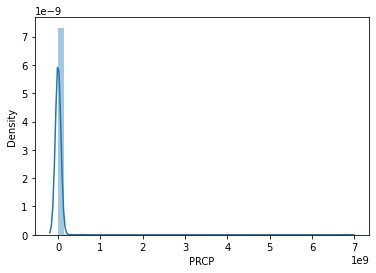

In [124]:
import seaborn as sns
y = np.exp(B_data['PRCP'])
sns.distplot(y)

<AxesSubplot:xlabel='PRCP', ylabel='Density'>

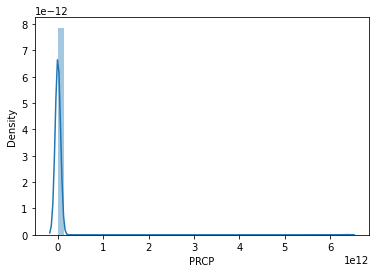

In [18]:
y = np.exp(C_data['PRCP'])
sns.distplot(y)

<AxesSubplot:xlabel='PRCP', ylabel='Density'>

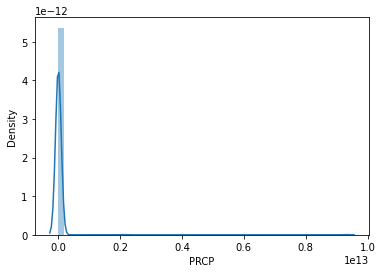

In [19]:
y = np.exp(W_data['PRCP'])
sns.distplot(y)

<AxesSubplot:xlabel='PRCP', ylabel='Density'>

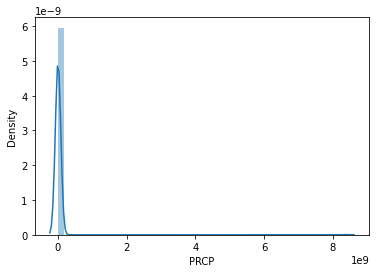

In [20]:
y = np.exp(D_data['PRCP'])
sns.distplot(y)

In [125]:
B_datalstm_x=B_data[['DX32','DX70','DX90','EMXP','TMAX','HDSD']]
C_datalstm_x=C_data[['DX32','DX70','DX90','EMXP','TMAX','HDSD']]
W_datalstm_x=W_data[['DX32','DX70','DX90','EMXP','TMAX','HDSD']]
D_datalstm_x=D_data[['DX32','DX70','DX90','EMXP','TMAX','HDSD']]

B_datalstm_y=B_data[['PRCP']]
C_datalstm_y=C_data[['PRCP']]
W_datalstm_y=W_data[['PRCP']]
D_datalstm_y=D_data[['PRCP']]
G_datalstm_y=G_data[['PRCP']]

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


数据预处理：

In [22]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

In [33]:
def create_interval_dataset(dataset, look_back):
    """
    :param dataset: input array of time intervals
    :param look_back: each training set feature length
    :return: convert an array of values into a dataset matrix.
    """
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:i+look_back])
        dataY.append(dataset[i+look_back])
    return np.asarray(dataX), np.asarray(dataY)

#df = pd.read_csv("path-to-your-time-interval-file")    
#dataset_init = np.asarray(df)    # if only 1 column
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大


In [71]:
dataset = B_datalstm_y
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.9)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]


In [72]:

look_back = 9
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)


In [57]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(30, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=20, verbose=2)
#model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions


Epoch 1/100
34/34 - 3s - loss: 0.0187
Epoch 2/100
34/34 - 0s - loss: 0.0158
Epoch 3/100
34/34 - 0s - loss: 0.0139
Epoch 4/100
34/34 - 0s - loss: 0.0136
Epoch 5/100
34/34 - 0s - loss: 0.0134
Epoch 6/100
34/34 - 0s - loss: 0.0133
Epoch 7/100
34/34 - 0s - loss: 0.0134
Epoch 8/100
34/34 - 0s - loss: 0.0127
Epoch 9/100
34/34 - 0s - loss: 0.0125
Epoch 10/100
34/34 - 0s - loss: 0.0125
Epoch 11/100
34/34 - 0s - loss: 0.0121
Epoch 12/100
34/34 - 0s - loss: 0.0121
Epoch 13/100
34/34 - 0s - loss: 0.0118
Epoch 14/100
34/34 - 0s - loss: 0.0116
Epoch 15/100
34/34 - 0s - loss: 0.0121
Epoch 16/100
34/34 - 0s - loss: 0.0114
Epoch 17/100
34/34 - 0s - loss: 0.0113
Epoch 18/100
34/34 - 0s - loss: 0.0110
Epoch 19/100
34/34 - 0s - loss: 0.0109
Epoch 20/100
34/34 - 0s - loss: 0.0109
Epoch 21/100
34/34 - 0s - loss: 0.0113
Epoch 22/100
34/34 - 0s - loss: 0.0109
Epoch 23/100
34/34 - 0s - loss: 0.0110
Epoch 24/100
34/34 - 0s - loss: 0.0117
Epoch 25/100
34/34 - 0s - loss: 0.0111
Epoch 26/100
34/34 - 0s - loss: 0.

In [73]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


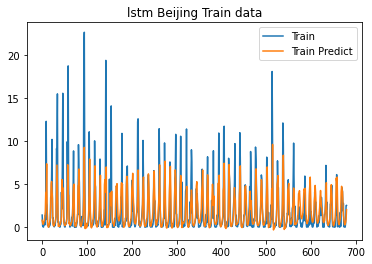

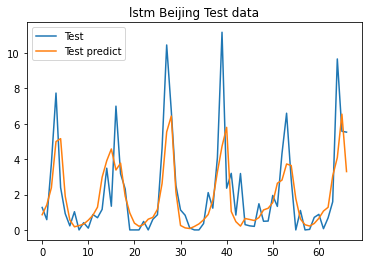

R2 score is 0.5539031347377059
mae is 1.1574068


In [75]:
plt.plot(trainY)
plt.plot(trainPredict)
plt.legend(['Train','Train Predict'])
plt.title('lstm Beijing Train data')
plt.show()
plt.plot(testY)
plt.plot(testPredict)
plt.legend(['Test','Test predict'])
plt.title("lstm Beijing Test data")
plt.show()

print('R2 score is',r2_score(testY,testPredict))
print('mae is',mean_absolute_error(testY,testPredict))

In [88]:
B_dataARIMA=B_data[['DATE','PRCP']]
C_dataARIMA=C_data[['DATE','PRCP']]
W_dataARIMA=W_data[['DATE','PRCP']]
D_dataARIMA=D_data[['DATE','PRCP']]


In [163]:
G_dataARIMA=G_data[['DATE','PRCP']]

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
B_dataARIMA.head()

,DATE,PRCP
0,1951-01-01,0.32
1,1951-02-01,0.40
2,1951-03-01,0.06
3,1951-04-01,0.04
4,1951-05-01,5.74


In [100]:
B_dataARIMA = B_dataARIMA.set_index('DATE', drop=True)
C_dataARIMA = C_dataARIMA.set_index('DATE', drop=True)
W_dataARIMA = W_dataARIMA.set_index('DATE', drop=True)
D_dataARIMA = D_dataARIMA.set_index('DATE', drop=True)

In [164]:
G_dataARIMA = G_dataARIMA.set_index('DATE', drop=True)

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


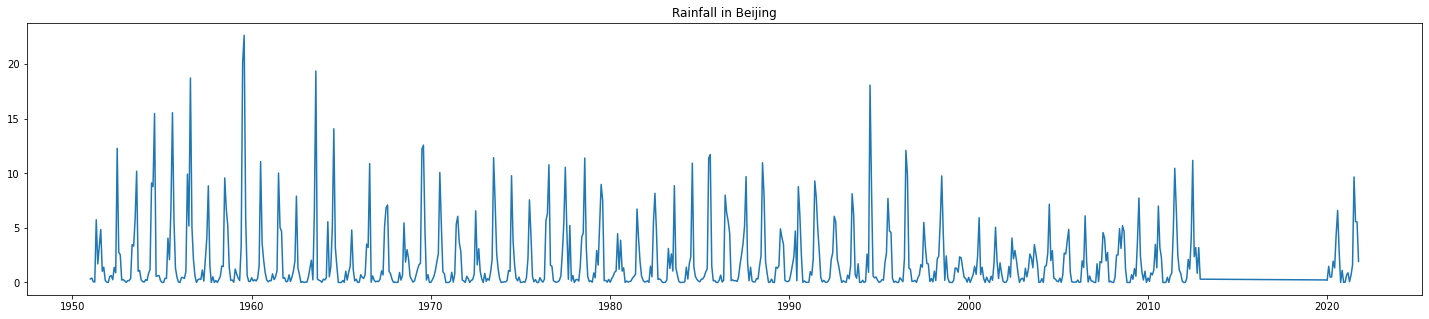

In [29]:
from matplotlib import pyplot
plt.figure(figsize=(25,5))
plt.plot(B_dataARIMA)
plt.title('Rainfall in Beijing')
plt.show()

In [30]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(B_dataARIMA)

<ipython-input-30-499245bfa39c>:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  adf_test.is_stationary(B_dataARIMA)


(0.01, False)

In [31]:
B_dataARIMA.shape

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(767, 1)

In [33]:
BB_train = B_dataARIMA[:718]
BB_test = B_dataARIMA[718:]

In [35]:
BB_train.shape
#BB_test.shape

(718, 1)

In [36]:
Arima_model = auto_arima(BB_train, start_p =1,start_q =1,max_p =8,max_q =8,
                        start_P =1,start_Q =1,max_P =8,max_Q =8,
                         m=12,seasonal = True, trace = True, d=1, D=1,
                         error_action = 'warn', suppress_warnings = True,
                         stepwise = True, random_state = 20, n_fits = 50 )
Arima_model.summary()

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3717.576, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3383.431, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3572.812, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3320.194, Time=0.62 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=3294.125, Time=1.28 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=3282.219, Time=1.45 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=3270.527, Time=3.37 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=3266.490, Time=4.46 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=3262.486, Time=6.57 sec
 ARIMA(1,1,0)(8,1,0)[12]             : AIC=3238.460, Time=10.12 sec
 ARIMA(1,1,0)(8,1,1)[12]             : AIC=3224.714, Time=23.91 sec
 ARIMA(1,1,0)(7,1,1)[12]             : AIC=inf, Time=29.85 sec
 ARIMA(1,1,0)(8,1,2)[12]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  718
Model:             SARIMAX(5, 1, 0)x(8, 1, [1], 12)   Log Likelihood               -1529.272
Date:                              Fri, 12 Nov 2021   AIC                           3088.544
Time:                                      17:05:27   BIC                           3156.917
Sample:                                           0   HQIC                          3114.965
                                              - 718                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7516      0.026    -28.505      0.000      -0.803      -0.700
ar.L2         -0.5742      0.038    -15.286      0.000      -0.648      -0.501
ar.L3         -0.4572      0.044    -10.369      0.000      -0.544      -0.371
ar.L4         -0.2995      0.051     -5.910      0.000      -0.399      -0.200
ar.L5         -0.1468      0.052     -2.801      0.005      -0.250      -0.044
ar.S.L12      -0.2176      0.063     -3.430      0.001      -0.342      -0.093
ar.S.L24      -0.1898      0.053     -3.602      0.000      -0.293      -0.087
ar.S.L36      -0.1404      0.041     -3.431      0.001      -0.221      -0.060
ar.S.L48      -0.1413      0.038     -3.754      0.000      -0.215      -0.068
ar.S.L60      -0.1827      0.031     -5.822      0.000      -0.244      -0.121
ar.S.L72      -0.1840      0.033     -5.608      0.000      -0.248      -0.120
ar.S.L84      -0.1647      0.033     -5.021      0.000      -0.229      -0.100
ar.S.L96      -0.1366      0.031     -4.385      0.000      -0.198      -0.076
ma.S.L12      -0.6100      0.066     -9.303      0.000      -0.738      -0.481
sigma2         4.3643      0.126     34.761      0.000       4.118       4.610
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              1403.14
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
prediction = pd.DataFrame(Arima_model.predict(n_periods =49), index = BB_test.index)
prediction.columns = ['Predicted rainfall']

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
prediction.head()

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Predicted rainfall
DATE,
2010-11-01,0.924254
2010-12-01,0.667897
2011-01-01,0.763662
2011-02-01,1.400426
2011-03-01,1.470703


D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


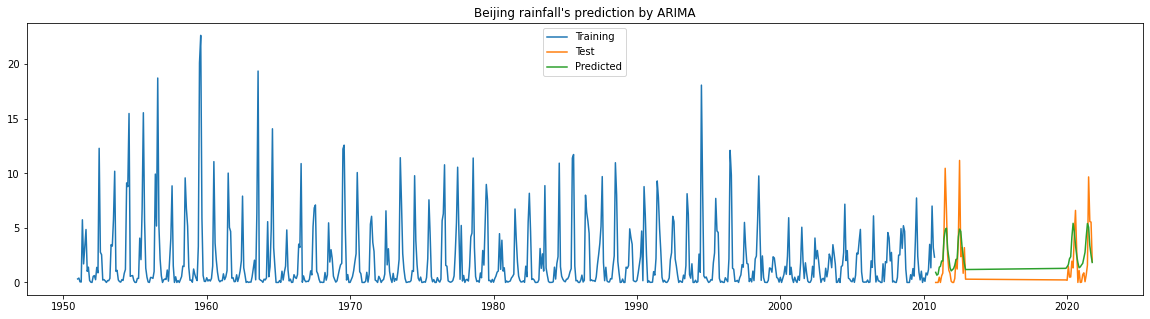

In [51]:
plt.figure(figsize = (20,5))
plt.plot(BB_train,label = 'Training')
plt.plot(BB_test['PRCP'], label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc = 'upper center')
plt.title("Beijing rainfall's prediction by ARIMA")
plt.show()

In [41]:
BB_test['Predicted_Rainfall'] = prediction
BB_test['Error'] =  BB_test['PRCP'] -  BB_test['Predicted_Rainfall']

In [42]:
BB_test.head()

,PRCP,Predicted_Rainfall,Error
DATE,,,
2010-11-01,0.00,0.924254,-0.924254
2010-12-01,0.00,0.667897,-0.667897
2011-01-01,0.00,0.763662,-0.763662
2011-02-01,0.48,1.400426,-0.920426
2011-03-01,0.00,1.470703,-1.470703


In [52]:
print("ARIMA Beijing's MAE",mean_absolute_error(BB_test.PRCP,BB_test.Predicted_Rainfall))

ARIMA Beijing's MAE 1.621567260204051


D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
#me_absolute_error(BB_test.PRCP,BB_test.Predicted_Rainfall)

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
print("Beijing's Prediction R^2 by ARIMA ",r2_score(BB_test.PRCP,BB_test.Predicted_Rainfall))


Beijing's Prediction R^2 by ARIMA  0.4108153372400545


D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


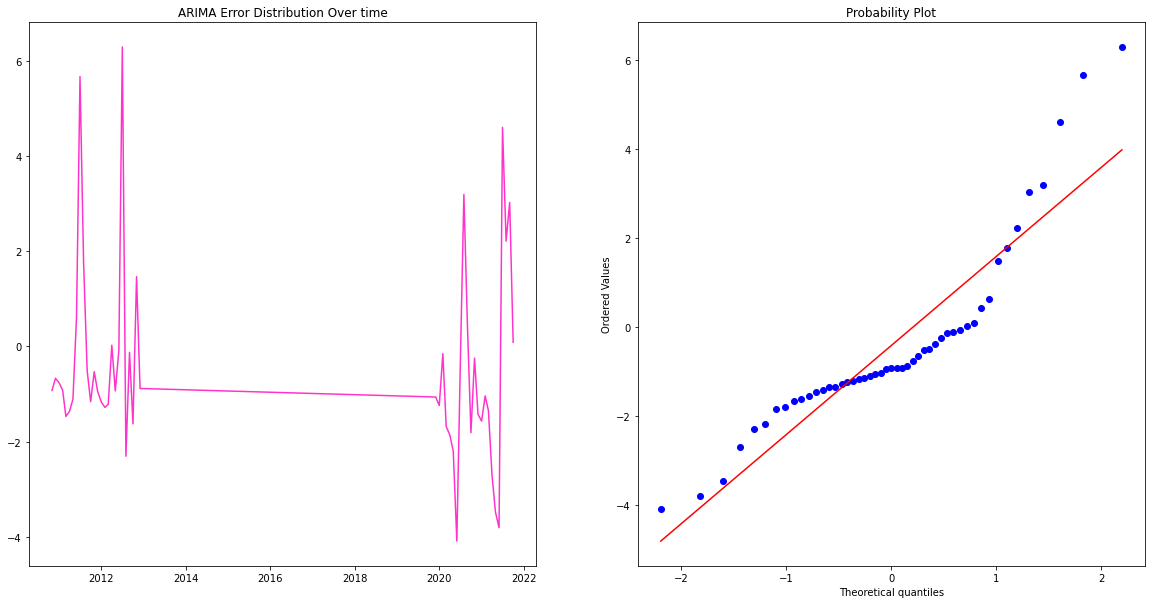

'plt.figure(figsize =(20,10))\npm.autocorr_plot(BB_test.Error)\nplt.show()'

In [54]:
plt.figure(figsize =(20,10))
plt.subplot(121)
plt.plot(BB_test.Error,color = '#ff33CC')
plt.title('ARIMA Error Distribution Over time')
plt.subplot(122)
scipy.stats.probplot(BB_test.Error,plot =plt)
plt.show()

'''plt.figure(figsize =(20,10))
pm.autocorr_plot(BB_test.Error)
plt.show()'''

In [203]:
dataset = B_datalstm_y
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]



look_back = 9
trainX,y_train  = create_dataset(trainlist,look_back)
testX,y_test = create_dataset(testlist,look_back)

x_train = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
x_test = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
from keras.layers.recurrent import GRU

seed =2021
np. random . seed ( seed )
modelGB = Sequential ()
modelGB .add(GRU(units=20,
                return_sequences =False ,
                activation ='tanh', 
                recurrent_activation ='hard_sigmoid',
                input_shape =(5 , 1)))
modelGB .add(Dense(units =1, activation ='linear'))
modelGB . compile (loss ='mean_squared_error',optimizer ='rmsprop')
print(modelGB . summary ())
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
gru_8 (GRU)                  (None, 4)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
=================================================================
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
None
'''
modelGB .fit( x_train , y_train , batch_size =16,epochs =100)

score_train = modelGB . evaluate ( x_train ,y_train , batch_size =16)
score_test = modelGB . evaluate (x_test , y_test , batch_size =16)
print ("in train MSE = ", round( score_train,5))
print ("in test MSE = ", round( score_test ,5))
modelGB.save(os.path.join("GRU_DATA","Test" + ".h5"))



D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 20)                1320      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
31/31 [==============================] - 5s 8ms/step - loss: 0.0280
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 7/100
31/31 [=======

31/31 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 87/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 88/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 89/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 90/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 91/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 92/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 93/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0126
Epoch 94/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 95/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 96/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 97/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 98/100
31/31 [=================

GRU R2 Beijing Rainfall score is 0.2943294749518012
Beijing GRU MAE is 1.4157224
Beijing GRU MSE score is 4.3238854
Beijing GRU RMSE score is 2.0793955


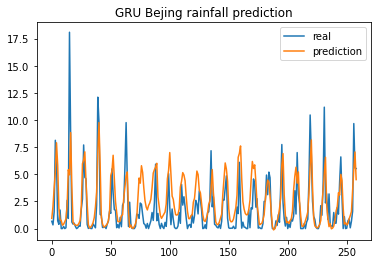

In [205]:
pred1 = modelGB . predict ( x_test )
# pred1 = scaler_y .inverse_transform (np. array(pred1).reshape((len(pred1), 1)))
pred1=scaler.inverse_transform(pred1)
y_test=scaler.inverse_transform(y_test)

plt.plot(y_test)
plt.plot(pred1)
plt.legend(['real','prediction'])
plt.title("GRU Bejing rainfall prediction")

print("GRU R2 Beijing Rainfall score is",r2_score(y_test,pred1))
print('Beijing GRU MAE is',mean_absolute_error(y_test,pred1))
print('Beijing GRU MSE score is',metrics.mean_squared_error(y_test,pred1))
print('Beijing GRU RMSE score is',np.sqrt(metrics.mean_squared_error(y_test,pred1)))


#成都

In [83]:
dataset = C_datalstm_y[:689]
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]



look_back = 6
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))


In [84]:
# create and fit the LSTM network
modelC = Sequential()
modelC.add(LSTM(30, input_shape=(None,1)))
modelC.add(Dense(1))
modelC.compile(loss='mean_squared_error', optimizer='adam')
modelC.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)
modelC.save(os.path.join("DATA","C_Test" + ".h5"))
# make predictions
trainPredict = modelC.predict(trainX)
testPredict = modelC.predict(testX)
#model = load_model(os.path.join("DATA","C_Test" + ".h5"))


Epoch 1/100
34/34 - 3s - loss: 0.0389
Epoch 2/100
34/34 - 0s - loss: 0.0307
Epoch 3/100
34/34 - 0s - loss: 0.0255
Epoch 4/100
34/34 - 0s - loss: 0.0233
Epoch 5/100
34/34 - 0s - loss: 0.0224
Epoch 6/100
34/34 - 0s - loss: 0.0221
Epoch 7/100
34/34 - 0s - loss: 0.0220
Epoch 8/100
34/34 - 0s - loss: 0.0214
Epoch 9/100
34/34 - 0s - loss: 0.0213
Epoch 10/100
34/34 - 0s - loss: 0.0210
Epoch 11/100
34/34 - 0s - loss: 0.0207
Epoch 12/100
34/34 - 0s - loss: 0.0204
Epoch 13/100
34/34 - 0s - loss: 0.0203
Epoch 14/100
34/34 - 0s - loss: 0.0198
Epoch 15/100
34/34 - 0s - loss: 0.0199
Epoch 16/100
34/34 - 0s - loss: 0.0197
Epoch 17/100
34/34 - 0s - loss: 0.0188
Epoch 18/100
34/34 - 0s - loss: 0.0188
Epoch 19/100
34/34 - 0s - loss: 0.0177
Epoch 20/100
34/34 - 0s - loss: 0.0173
Epoch 21/100
34/34 - 0s - loss: 0.0174
Epoch 22/100
34/34 - 0s - loss: 0.0166
Epoch 23/100
34/34 - 0s - loss: 0.0166
Epoch 24/100
34/34 - 0s - loss: 0.0169
Epoch 25/100
34/34 - 0s - loss: 0.0162
Epoch 26/100
34/34 - 0s - loss: 0.

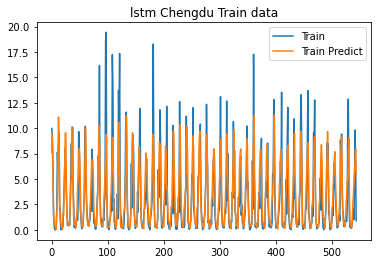

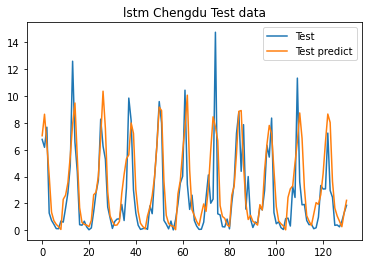

Chengdu LSTM R2 score is 0.5205585460392094
Chengdu LSTM MAE score is 1.3774557
Chengdu LSTM MSE score is 4.328131
Chengdu LSTM RMSE score is 2.0804162


In [85]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

plt.plot(trainY)
plt.plot(trainPredict)
plt.legend(['Train','Train Predict'])
plt.title('lstm Chengdu Train data')
plt.show()
plt.plot(testY)
plt.plot(testPredict)
plt.legend(['Test','Test predict'])
plt.title("lstm Chengdu Test data")
plt.show()

print('Chengdu LSTM R2 score is',r2_score(testY,testPredict))
print('Chengdu LSTM MAE score is',mean_absolute_error(testY,testPredict))
print('Chengdu LSTM MSE score is',metrics.mean_squared_error(testY,testPredict))
print('Chengdu LSTM RMSE score is',np.sqrt(metrics.mean_squared_error(testY,testPredict)))

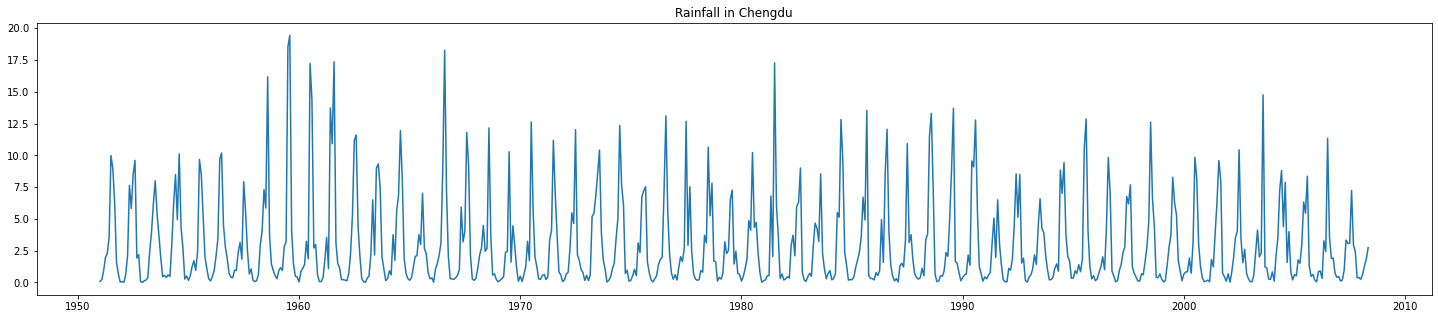

In [102]:
from matplotlib import pyplot
plt.figure(figsize=(25,5))
plt.plot(C_dataARIMA[:689])
plt.title('Rainfall in Chengdu')
plt.show()



广州

In [183]:
dataset = G_datalstm_y[:720]
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.9)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]



look_back = 6
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
# create and fit the LSTM network
modelG = Sequential()
modelG.add(LSTM(30, input_shape=(None,1)))
modelG.add(Dense(1))
modelG.compile(loss='mean_squared_error', optimizer='adam')
modelG.fit(trainX, trainY, epochs=130, batch_size=8, verbose=2)
modelG.save(os.path.join("DATA","TestG" + ".h5"))
# make predictions

#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = modelG.predict(trainX)
testPredict = modelG.predict(testX)


D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/130
81/81 - 4s - loss: 0.0242
Epoch 2/130
81/81 - 0s - loss: 0.0176
Epoch 3/130
81/81 - 0s - loss: 0.0165
Epoch 4/130
81/81 - 0s - loss: 0.0162
Epoch 5/130
81/81 - 0s - loss: 0.0160
Epoch 6/130
81/81 - 0s - loss: 0.0162
Epoch 7/130
81/81 - 0s - loss: 0.0163
Epoch 8/130
81/81 - 0s - loss: 0.0159
Epoch 9/130
81/81 - 0s - loss: 0.0159
Epoch 10/130
81/81 - 0s - loss: 0.0156
Epoch 11/130
81/81 - 0s - loss: 0.0160
Epoch 12/130
81/81 - 0s - loss: 0.0158
Epoch 13/130
81/81 - 0s - loss: 0.0158
Epoch 14/130
81/81 - 0s - loss: 0.0160
Epoch 15/130
81/81 - 0s - loss: 0.0161
Epoch 16/130
81/81 - 0s - loss: 0.0158
Epoch 17/130
81/81 - 0s - loss: 0.0155
Epoch 18/130
81/81 - 0s - loss: 0.0155
Epoch 19/130
81/81 - 0s - loss: 0.0156
Epoch 20/130
81/81 - 0s - loss: 0.0155
Epoch 21/130
81/81 - 0s - loss: 0.0157
Epoch 22/130
81/81 - 0s - loss: 0.0156
Epoch 23/130
81/81 - 0s - loss: 0.0157
Epoch 24/130
81/81 - 0s - loss: 0.0156
Epoch 25/130
81/81 - 0s - loss: 0.0157
Epoch 26/130
81/81 - 0s - loss: 0.

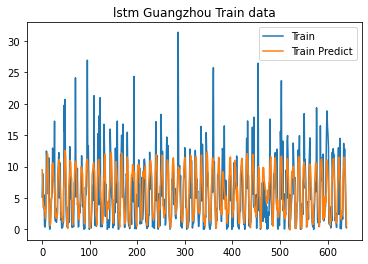

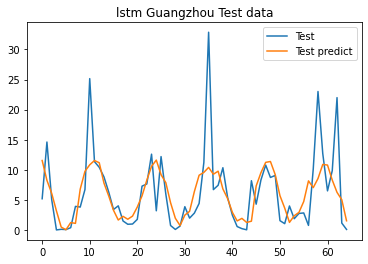

Guangzhou R2 score is 0.3742117313460869
Guangzhou LSTM MAE score is 3.1154234
Guangzhou LSTM MSE score is 25.911938
Guangzhou LSTM RMSE score is 5.090377


In [185]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

plt.plot(trainY)
plt.plot(trainPredict)
plt.legend(['Train','Train Predict'])
plt.title('lstm Guangzhou Train data')
plt.show()
plt.plot(testY)
plt.plot(testPredict)
plt.legend(['Test','Test predict'])
plt.title("lstm Guangzhou Test data")
plt.show()

print('Guangzhou R2 score is',r2_score(testY,testPredict))
print('Guangzhou LSTM MAE score is',mean_absolute_error(testY,testPredict))
print('Guangzhou LSTM MSE score is',metrics.mean_squared_error(testY,testPredict))
print('Guangzhou LSTM RMSE score is',np.sqrt(metrics.mean_squared_error(testY,testPredict)))

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


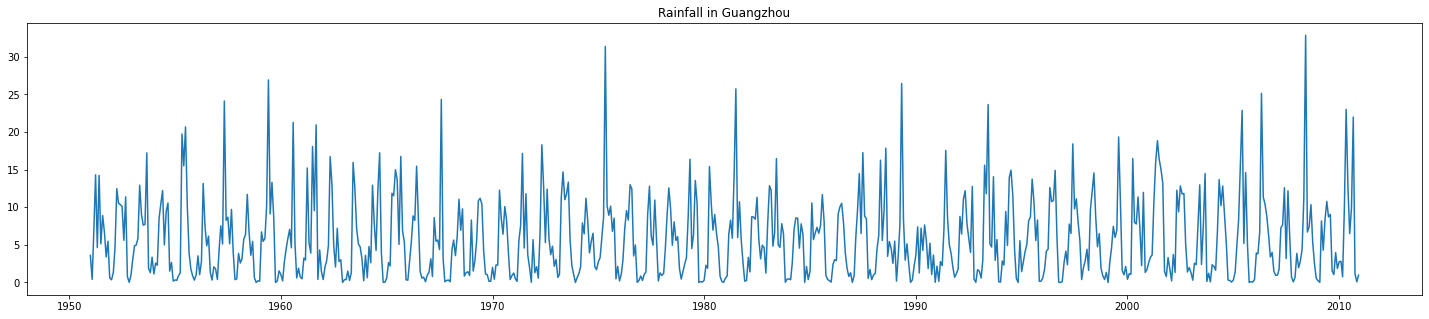

In [186]:
from matplotlib import pyplot
plt.figure(figsize=(25,5))
plt.plot(G_dataARIMA[:720])
plt.title('Rainfall in Guangzhou')
plt.show()

In [187]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(G_dataARIMA[:720])

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-187-1bc03c491283>:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  adf_test.is_stationary(G_dataARIMA[:720])


(0.01, False)

In [188]:
B_dataARIMA.shape

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(767, 1)

In [189]:
GG_train = G_dataARIMA[:680]
GG_test = G_dataARIMA[680:720]

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
GG_train.shape

(680, 1)

In [192]:
Arima_modelG = auto_arima(GG_train, start_p =1,start_q =1,max_p =8,max_q =8,
                        start_P =1,start_Q =1,max_P =8,max_Q =8,
                         m=12,seasonal = True, trace = True, d=1, D=1,
                         error_action = 'warn', suppress_warnings = True,
                         stepwise = True, random_state = 20, n_fits = 30 )
Arima_modelG.summary()

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=6.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4534.221, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4201.842, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4359.071, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4112.683, Time=1.98 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4073.249, Time=5.10 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4055.760, Time=7.57 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4043.755, Time=28.26 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=4018.425, Time=45.29 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=4009.694, Time=57.41 sec
 ARIMA(1,1,0)(8,1,0)[12]             : AIC=4005.288, Time=95.18 sec
 ARIMA(1,1,0)(8,1,1)[12]             : AIC=inf, Time=755.95 sec
 ARIMA(1,1,0)(7,1,1)[12]             : AIC=inf, Time=422.46 sec
 ARIMA(0,1,0)(8,1,0)[12]       

KeyboardInterrupt: 

In [ ]:
prediction = pd.DataFrame(Arima_modelG.predict(n_periods =40), index = GG_test.index)
prediction.columns = ['Predicted rainfall']

In [ ]:
prediction.head()

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(GG_train,label = 'Training')
plt.plot(GG_test['PRCP'], label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc = 'upper center')
plt.title("Guangzhou rainfall's prediction by ARIMA")
plt.show()


In [ ]:
GG_test['Predicted_Rainfall'] = prediction
GG_test['Error'] =  BB_test['PRCP'] -  BB_test['Predicted_Rainfall']


In [ ]:
GG_test.head()

In [ ]:
print("ARIMA Guangzhou's MAE",mean_absolute_error(GG_test.PRCP,GG_test.Predicted_Rainfall))
print("Guangzhou's Prediction R^2 by ARIMA ",r2_score(GG_test.PRCP,GG_test.Predicted_Rainfall))

In [ ]:
plt.figure(figsize =(20,10))
plt.subplot(121)
plt.plot(GG_test.Error,color = '#ff33CC')
plt.title('ARIMA Error Distribution Over time')
plt.subplot(122)
scipy.stats.probplot(GG_test.Error,plot =plt)
plt.show()

GRU广州

In [206]:
dataset = G_datalstm_y
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
look_back = 6
trainX,y_train  = create_dataset(trainlist,look_back)
testX,y_test = create_dataset(testlist,look_back)

x_train = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
x_test = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [208]:
from keras.layers.recurrent import GRU

seed =2021
np. random . seed ( seed )
modelGG = Sequential ()
modelGG .add(GRU(units=20,
                return_sequences =False ,
                activation ='tanh', 
                recurrent_activation ='hard_sigmoid',
                input_shape =(5 , 1)))
modelGG .add(Dense(units =1, activation ='linear'))
modelGG . compile (loss ='mean_squared_error',optimizer ='rmsprop')
print(modelGG . summary ())

modelGG .fit( x_train , y_train , batch_size =16,epochs =100)

score_train = modelGG . evaluate ( x_train ,y_train , batch_size =1)
score_test = modelGG . evaluate (x_test , y_test , batch_size =1)
print ("in train MSE = ", round( score_train,5))
print ("in test MSE = ", round( score_test ,5))
modelGG.save(os.path.join("GRU_DATA","Test_G" + ".h5"))


pred1 = modelGB . predict ( x_test )

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 20)                1320      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
31/31 [==============================] - 4s 5ms/step - loss: 0.0246
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0214
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0193
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 7/100
31/31 [=========

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GRU R2 Guangzhou Rainfall score is 0.36814780759404486
Guangzhou GRU MAE is 3.2471485
Guangzhou GRU MSE score is 23.40297
Guangzhou GRU RMSE score is 4.8376617


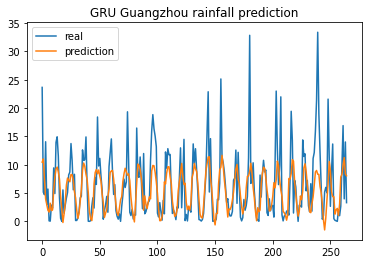

In [209]:
pred1 = modelGG . predict ( x_test )
# pred1 = scaler_y .inverse_transform (np. array(pred1).reshape((len(pred1), 1)))
pred1=scaler.inverse_transform(pred1)
y_test=scaler.inverse_transform(y_test)

plt.plot(y_test)
plt.plot(pred1)
plt.legend(['real','prediction'])
plt.title("GRU Guangzhou rainfall prediction")

print("GRU R2 Guangzhou Rainfall score is",r2_score(y_test,pred1))
print('Guangzhou GRU MAE is',mean_absolute_error(y_test,pred1))
print('Guangzhou GRU MSE score is',metrics.mean_squared_error(y_test,pred1))
print('Guangzhou GRU RMSE score is',np.sqrt(metrics.mean_squared_error(y_test,pred1)))


In [217]:
W_datalstm_y.shape

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(751, 1)

In [239]:
#武汉
dataset = W_datalstm_y[:720]
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.70)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]



look_back = 7
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
# create and fit the LSTM network
modelW = Sequential()
modelW.add(LSTM(30, input_shape=(None,1)))
modelW.add(Dense(1))
modelW.compile(loss='mean_squared_error', optimizer='adam')
modelW.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)
modelW.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = modelW.predict(trainX)
testPredict = modelW.predict(testX)


D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/100
16/16 - 4s - loss: 0.0232
Epoch 2/100
16/16 - 0s - loss: 0.0176
Epoch 3/100
16/16 - 0s - loss: 0.0169
Epoch 4/100
16/16 - 0s - loss: 0.0163
Epoch 5/100
16/16 - 0s - loss: 0.0157
Epoch 6/100
16/16 - 0s - loss: 0.0151
Epoch 7/100
16/16 - 0s - loss: 0.0145
Epoch 8/100
16/16 - 0s - loss: 0.0139
Epoch 9/100
16/16 - 0s - loss: 0.0138
Epoch 10/100
16/16 - 0s - loss: 0.0138
Epoch 11/100
16/16 - 0s - loss: 0.0135
Epoch 12/100
16/16 - 0s - loss: 0.0138
Epoch 13/100
16/16 - 0s - loss: 0.0135
Epoch 14/100
16/16 - 0s - loss: 0.0135
Epoch 15/100
16/16 - 0s - loss: 0.0134
Epoch 16/100
16/16 - 0s - loss: 0.0135
Epoch 17/100
16/16 - 0s - loss: 0.0135
Epoch 18/100
16/16 - 0s - loss: 0.0135
Epoch 19/100
16/16 - 0s - loss: 0.0134
Epoch 20/100
16/16 - 0s - loss: 0.0134
Epoch 21/100
16/16 - 0s - loss: 0.0133
Epoch 22/100
16/16 - 0s - loss: 0.0135
Epoch 23/100
16/16 - 0s - loss: 0.0134
Epoch 24/100
16/16 - 0s - loss: 0.0133
Epoch 25/100
16/16 - 0s - loss: 0.0134
Epoch 26/100
16/16 - 0s - loss: 0.

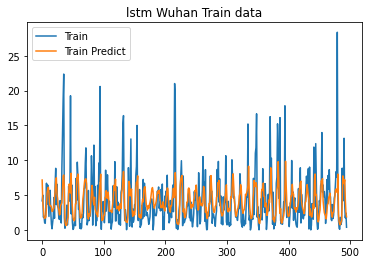

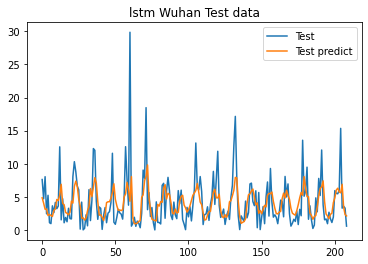

R2 score is 0.2455168469718273
Wuhan LSTM MAE is 2.215884
Wuhan LSTM MSE score is 11.08664
Wuhan LSTM RMSE score is 3.3296607


In [241]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

plt.plot(trainY)
plt.plot(trainPredict)
plt.legend(['Train','Train Predict'])
plt.title('lstm Wuhan Train data')
plt.show()
plt.plot(testY)
plt.plot(testPredict)
plt.legend(['Test','Test predict'])
plt.title("lstm Wuhan Test data")
plt.show()

print('R2 score is',r2_score(testY,testPredict))
print('Wuhan LSTM MAE is',mean_absolute_error(testY,testPredict))
print('Wuhan LSTM MSE score is',metrics.mean_squared_error(testY,testPredict))
print('Wuhan LSTM RMSE score is',np.sqrt(metrics.mean_squared_error(testY,testPredict)))

In [248]:
#GRU
dataset = B_datalstm_y
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

look_back = 7
trainX,y_train  = create_dataset(trainlist,look_back)
testX,y_test = create_dataset(testlist,look_back)

x_train = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
x_test = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [243]:
from keras.layers.recurrent import GRU
seed =2021
np. random . seed ( seed )
modelGW = Sequential ()
modelGW .add(GRU(units=20,
                return_sequences =False ,
                activation ='tanh', 
                recurrent_activation ='hard_sigmoid',
                input_shape =(5 , 1)))
modelGW .add(Dense(units =1, activation ='linear'))
modelGW . compile (loss ='mean_squared_error',optimizer ='rmsprop')
print(modelGB . summary ())


modelGW .fit( x_train , y_train , batch_size =16,epochs =100)

score_train = modelGW . evaluate ( x_train ,y_train , batch_size =1)
score_test = modelGW . evaluate (x_test , y_test , batch_size =1)
print ("in train MSE = ", round( score_train,5))
print ("in test MSE = ", round( score_test ,5))
modelGW.save(os.path.join("GRU_DATA","Test_W" + ".h5"))



D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 20)                1320      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
38/38 [==============================] - 6s 8ms/step - loss: 0.0193
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 3/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 4/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 5/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0153
Epoch 6/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 7/100
38/38 [========

D:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GRU R2 Wuhan Rainfall score is 0.39414093932136063
Wuhan GRU MAE is 1.1279597
Wuhan GRU MSE score is 2.897639
Wuhan GRU RMSE score is 1.7022452


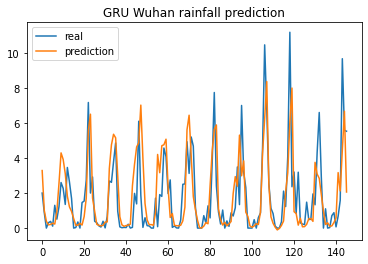

In [249]:
pred1 = modelGW . predict ( x_test )
# pred1 = scaler_y .inverse_transform (np. array(pred1).reshape((len(pred1), 1)))
pred1=scaler.inverse_transform(pred1)
y_test=scaler.inverse_transform(y_test)

plt.plot(y_test)
plt.plot(pred1)
plt.legend(['real','prediction'])
plt.title("GRU Wuhan rainfall prediction")

print("GRU R2 Wuhan Rainfall score is",r2_score(y_test,pred1))
print('Wuhan GRU MAE is',mean_absolute_error(y_test,pred1))
print('Wuhan GRU MSE score is',metrics.mean_squared_error(y_test,pred1))
print('Wuhan GRU RMSE score is',np.sqrt(metrics.mean_squared_error(y_test,pred1)))
